In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# 读取数据集
data = pd.read_csv('kddcup.data.gz')

# 标识出所有的字符串列
string_columns = data.select_dtypes(include=['object']).columns

# 对每一列进行标签编码
encoder = LabelEncoder()
for col in string_columns:
    data[col] = encoder.fit_transform(data[col])
# pca = PCA(n_components=10)
# data = pca.fit_transform(data)
# data

array([[-1.67156125e+03,  3.43490248e+03, -2.16528083e+01, ...,
        -1.43493231e+01,  3.84828437e-01, -2.87973739e+00],
       [-1.59858114e+03,  1.34879703e+02, -2.15261101e+01, ...,
        -1.43437158e+01,  3.86083336e-01, -2.86667639e+00],
       [-1.60133266e+03,  9.38880590e+02, -2.16371934e+01, ...,
        -1.42802909e+01,  3.84498107e-01, -2.85377415e+00],
       ...,
       [-1.61584503e+03,  2.51688508e+03, -2.78747570e+01, ...,
         2.61571878e+00, -2.28538228e-01, -2.83539228e-01],
       [-1.61557935e+03,  1.40884881e+02, -2.78935287e+01, ...,
         2.61705736e+00, -2.27933528e-01, -2.80452610e-01],
       [-1.61562137e+03,  4.88491755e+00, -2.64969078e+01, ...,
         1.10584698e+00, -1.58767300e-01, -6.05828036e-01]])

In [ ]:
from sklearn.neighbors._base import (
    KNeighborsMixin, 
    RadiusNeighborsMixin, 
    NeighborsBase
)


class NearestNeighbors(KNeighborsMixin, RadiusNeighborsMixin, NeighborsBase):
    def __init__(
        self,
        *,
        n_neighbors=5,
        radius=1.0,
        algorithm="auto",
        leaf_size=30,
        metric="minkowski",
        p=2,
        metric_params=None,
        n_jobs=None,
    ):
        super().__init__(
            n_neighbors=n_neighbors,
            radius=radius,
            algorithm=algorithm,
            leaf_size=leaf_size,
            metric=metric,
            p=p,
            metric_params=metric_params,
            n_jobs=n_jobs,
        )

    def fit(self, X, y=None):
        return self._fit(X)


In [ ]:
from sklearn.cluster._dbscan_inner import dbscan_inner
import numpy as np
import numbers
import warnings
from scipy import sparse
from sklearn.utils import check_scalar
# 
# from ..utils import check_scalar
# from ..base import BaseEstimator, ClusterMixin
# from ..utils.validation import _check_sample_weight
# from ..neighbors import NearestNeighbors
# 
# from ._dbscan_inner import dbscan_inner

class DBSCAN(object):
    _estimator_type = "clusterer"

    def __init__(
        self,
        eps=0.5,
        *,
        min_samples=5,
        metric="euclidean",
        metric_params=None,
        algorithm="auto",
        leaf_size=30,
        p=None,
        n_jobs=None,
    ):
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric
        self.metric_params = metric_params
        self.algorithm = algorithm
        self.leaf_size = leaf_size
        self.p = p
        self.n_jobs = n_jobs

    def fit(self, X, y=None, sample_weight=None):
        if self.metric == "precomputed" and sparse.issparse(X):
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", sparse.SparseEfficiencyWarning)
                X.setdiag(X.diagonal())  # XXX: modifies X's internals in-place
        
        neighbors_model = NearestNeighbors(
            radius=self.eps,
            algorithm=self.algorithm,
            leaf_size=self.leaf_size,
            metric=self.metric,
            metric_params=self.metric_params,
            p=self.p,
            n_jobs=self.n_jobs,
        )
        neighbors_model.fit(X)
        neighborhoods = neighbors_model.radius_neighbors(X, return_distance=False)

        if sample_weight is None:
            n_neighbors = np.array([len(neighbors) for neighbors in neighborhoods])
        else:
            n_neighbors = np.array(
                [np.sum(sample_weight[neighbors]) for neighbors in neighborhoods]
            )

        labels = np.full(X.shape[0], -1, dtype=np.intp)

        core_samples = np.asarray(n_neighbors >= self.min_samples, dtype=np.uint8)
        dbscan_inner(core_samples, neighborhoods, labels)

        self.core_sample_indices_ = np.where(core_samples)[0]
        self.labels_ = labels

        if len(self.core_sample_indices_):
            self.components_ = X[self.core_sample_indices_].copy()
        else:
            self.components_ = np.empty((0, X.shape[1]))
        return self

    def fit_predict(self, X, y=None, sample_weight=None):
        self.fit(X, sample_weight=sample_weight)
        return self.labels_

    def _more_tags(self):
        return {"pairwise": self.metric == "precomputed"}


D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

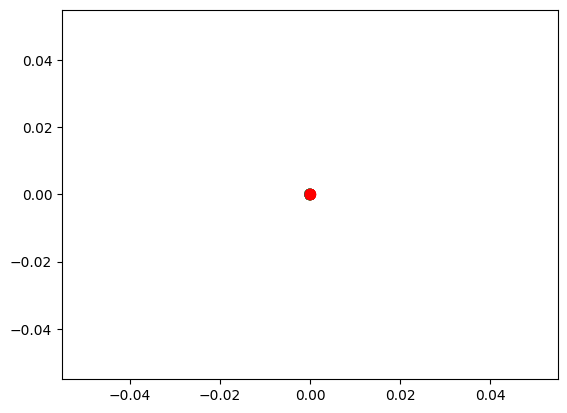

In [6]:
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('kddcup.data.gz', nrows=100)
# 标识出所有的字符串列
string_columns = data.select_dtypes(include=['object']).columns

# 对每一列进行标签编码
encoder = LabelEncoder()
for col in string_columns:
    data[col] = encoder.fit_transform(data[col])
data = data.values

# 聚类
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

# 结果展示
import matplotlib.pyplot as plt
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=50, alpha=0.5)
plt.show()